<div class="alert alert-info">
  <h1 style="font-size:25px;">
      <strong>Projet 3 OpenFoodFacts</strong>
</div>

<div class="alert alert-info">
  <h1 style="font-size:25px;">
      <strong>Étape 2</strong> Analyse Exploratoire - Notebook
</div>

## <font color="#00afe6">Sommaire</font>
[01. Chargement](#section_1)     
[02. Analyses Univariée](#section_2)     
[03. Analyses Multivariée](#section_3)     
[04. Analyse en Composantes Principales (ACP)](#section_4)          
[05. Analyse exploratoire avec l'ANOVA](#section_5)   

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Environnement

In [5]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

<div class="alert alert-info">
    <font id="section_1">
    <h1 style="font-size:25px;"><strong>01. Chargement</strong></h1>
</div>

In [6]:
data_ana = pd.read_csv('cleaned_openfoodfacts.csv', sep='\t', low_memory=False)

In [134]:
data_ana.columns.sort_values().to_list()

['additives_n',
 'calc_global_score',
 'calc_nutriscore',
 'carbohydrates_100g',
 'categories_fr',
 'code',
 'countries_fr',
 'energy_100g',
 'fat_100g',
 'fiber_100g',
 'fruits-vegetables-rate_100g',
 'main_category_fr',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'proteins_100g',
 'salt_100g',
 'saturated-fat_100g',
 'sodium_100g',
 'states_fr',
 'sugars_100g']

In [135]:
data_ana.sample()

,code,states_fr,countries_fr,energy_100g,proteins_100g,salt_100g,sodium_100g,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,pnns_groups_2,pnns_groups_1,categories_fr,main_category_fr,fruits-vegetables-rate_100g,calc_global_score,calc_nutriscore
179697,0099482437862,"A compléter,Informations nutritionnelles compl...",États-Unis,209.0,0.0,0.0,0.0,0.0,10.0,0.0,12.5,0.0,b,2.0,2.0,0.4,unknown,unknown,unknown,unknown,45,3,b


In [136]:
data_ana.shape

(189590, 23)

In [137]:
data_ana.isna().sum()

code                               1
states_fr                          1
countries_fr                      49
energy_100g                        0
proteins_100g                      0
salt_100g                          0
sodium_100g                        0
additives_n                    20555
sugars_100g                        0
fat_100g                           0
carbohydrates_100g                 0
saturated-fat_100g                 0
nutrition_grade_fr             32000
nutrition-score-fr_100g        32000
nutrition-score-uk_100g        32000
fiber_100g                         0
pnns_groups_2                      0
pnns_groups_1                      0
categories_fr                      0
main_category_fr                   0
fruits-vegetables-rate_100g        0
calc_global_score                  0
calc_nutriscore                    0
dtype: int64

<AxesSubplot:>

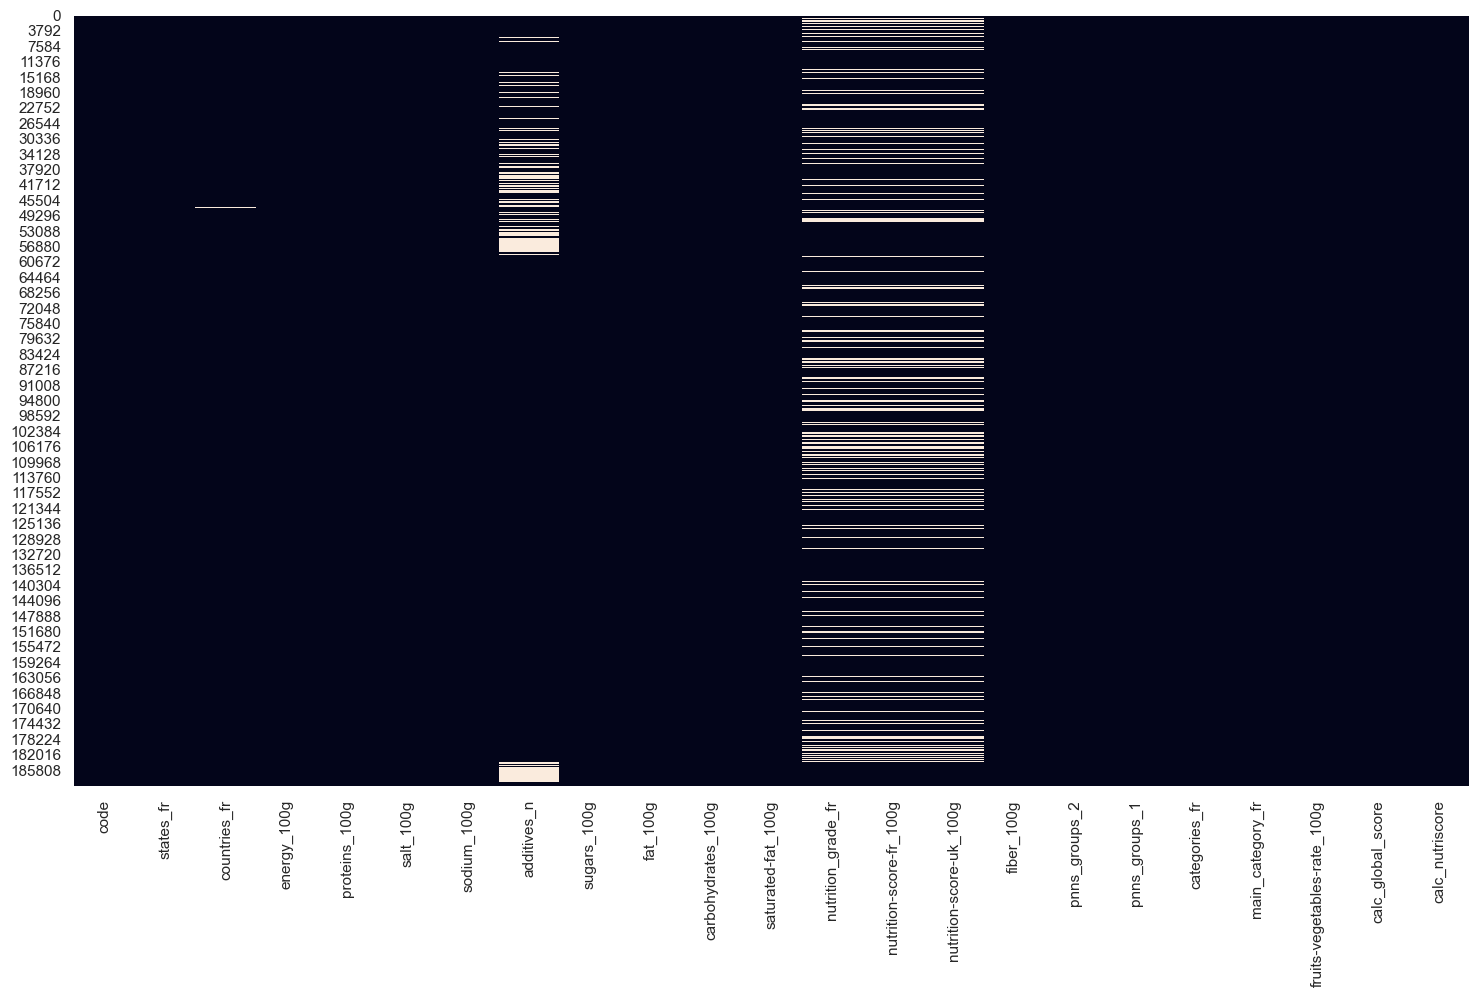

In [138]:
plt.figure(figsize=(18,10))
sns.heatmap(data_ana.isnull(), cbar=False)

<div class="alert alert-info">
    <font id="section_2">
    <h1 style="font-size:25px;"><strong>02. Analyses Univariée</strong></h1>
</div>

In [139]:
data_ana.dtypes

code                            object
states_fr                       object
countries_fr                    object
energy_100g                    float64
proteins_100g                  float64
salt_100g                      float64
sodium_100g                    float64
additives_n                    float64
sugars_100g                    float64
fat_100g                       float64
carbohydrates_100g             float64
saturated-fat_100g             float64
nutrition_grade_fr              object
nutrition-score-fr_100g        float64
nutrition-score-uk_100g        float64
fiber_100g                     float64
pnns_groups_2                   object
pnns_groups_1                   object
categories_fr                   object
main_category_fr                object
fruits-vegetables-rate_100g      int64
calc_global_score                int64
calc_nutriscore                 object
dtype: object

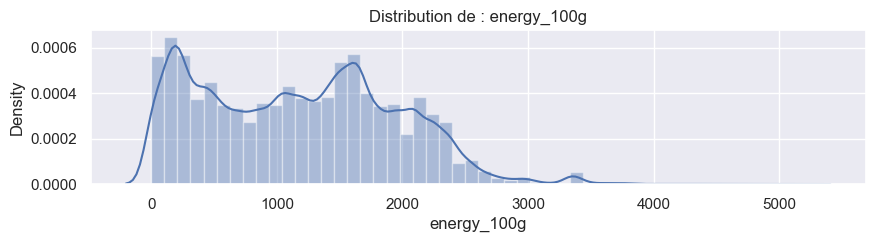

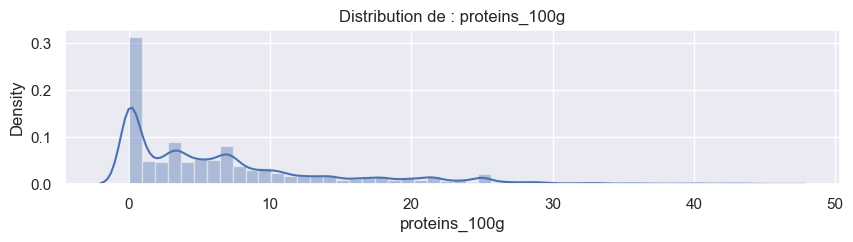

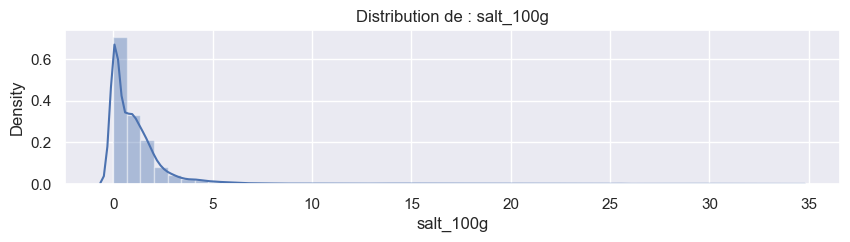

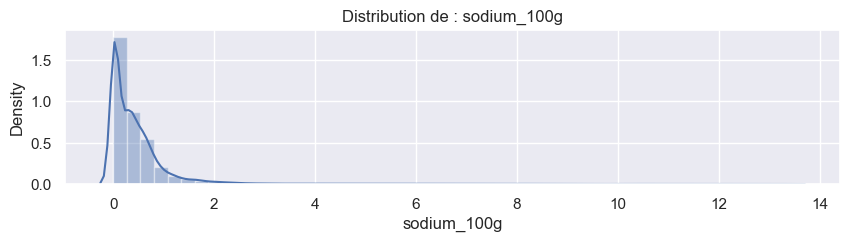

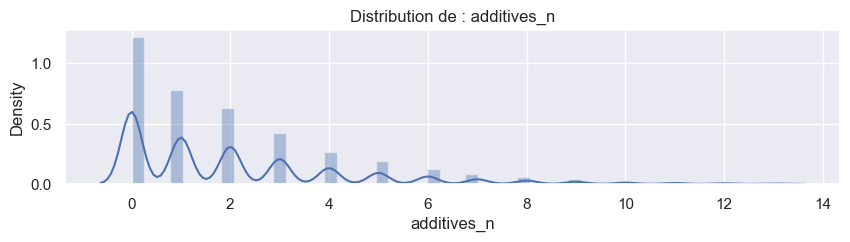

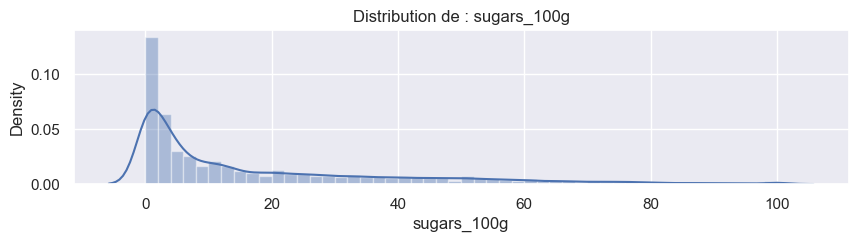

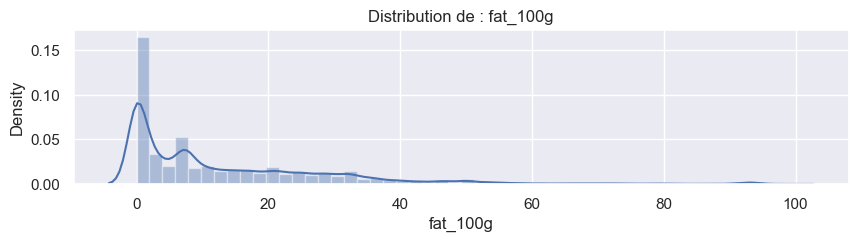

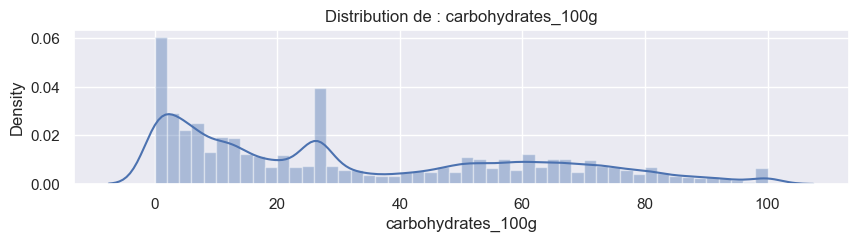

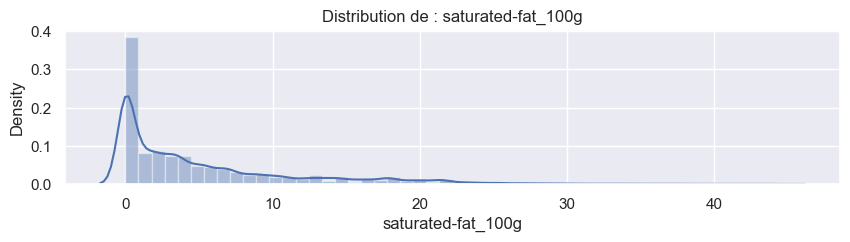

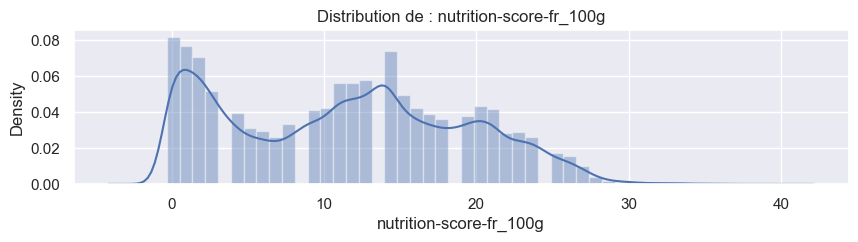

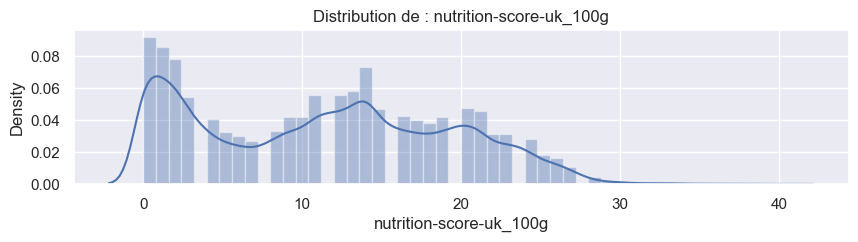

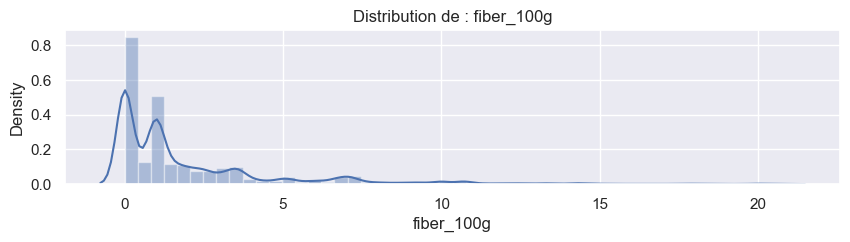

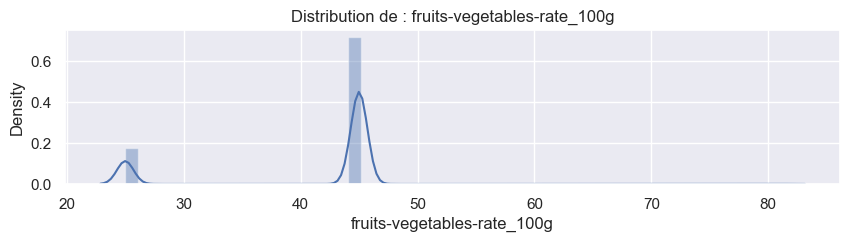

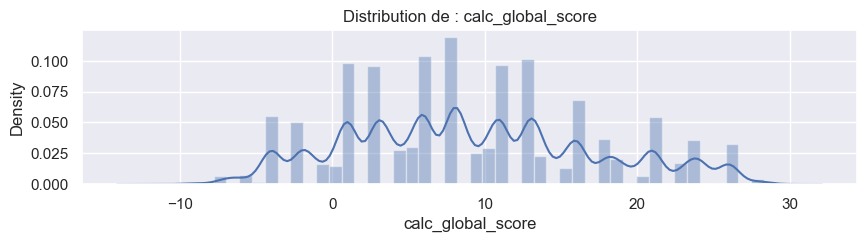

In [140]:
import warnings
warnings.filterwarnings('ignore')

numeric_columns = data_ana.select_dtypes(include = ['int32','float64','int64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data_ana[column], bins=50)
    #sns.histplot(data_ana[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

In [141]:
numeric_columns

Index(['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'additives_n', 'sugars_100g', 'fat_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'fiber_100g', 'fruits-vegetables-rate_100g',
       'calc_global_score'],
      dtype='object')

### Boîtes à moustaches

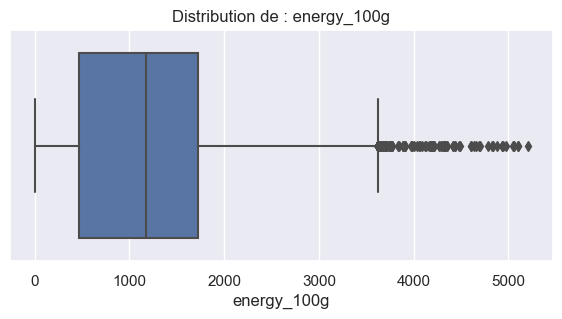

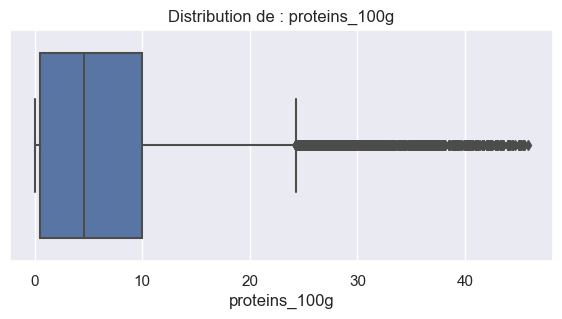

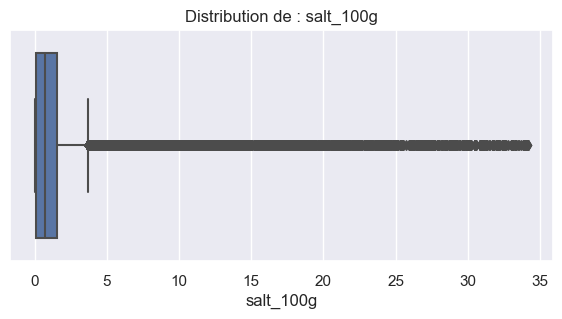

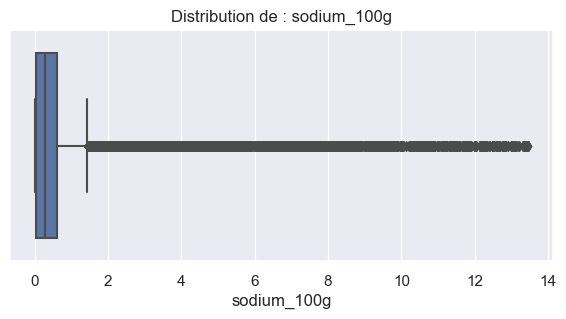

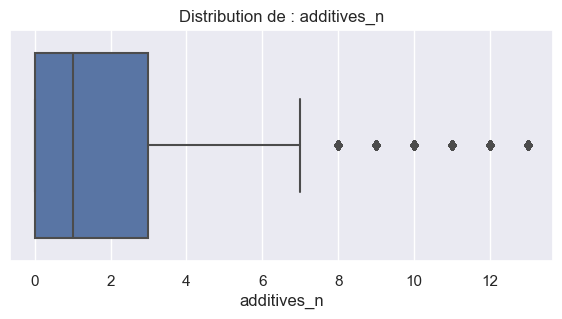

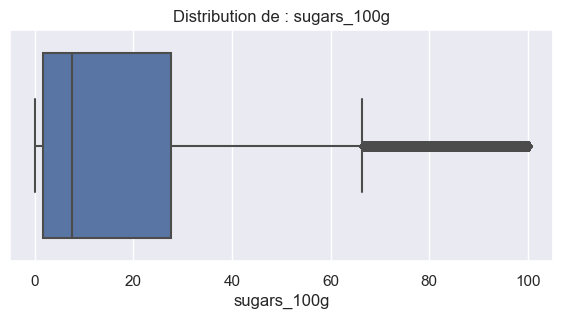

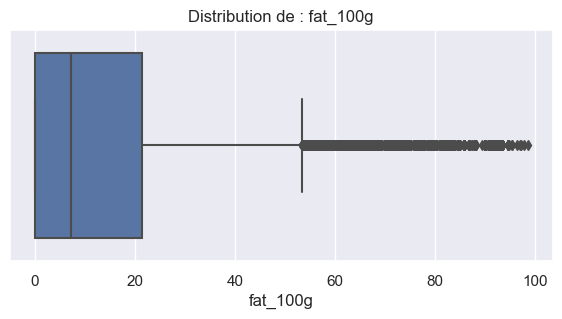

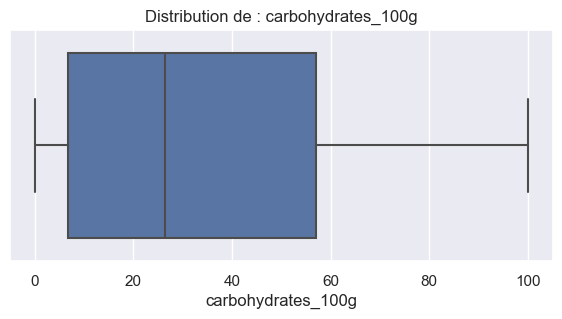

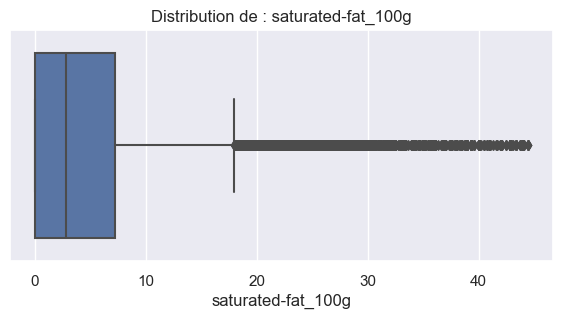

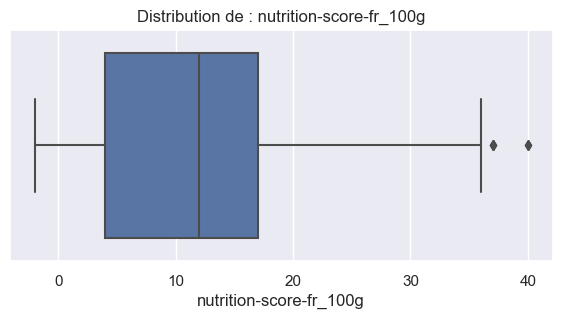

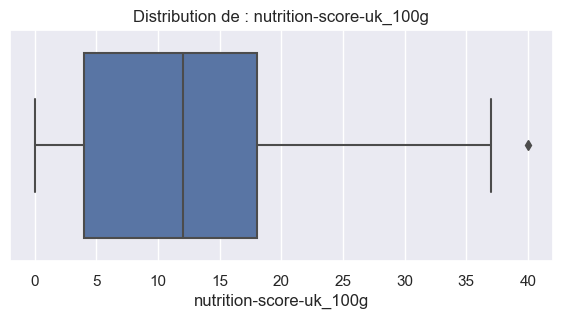

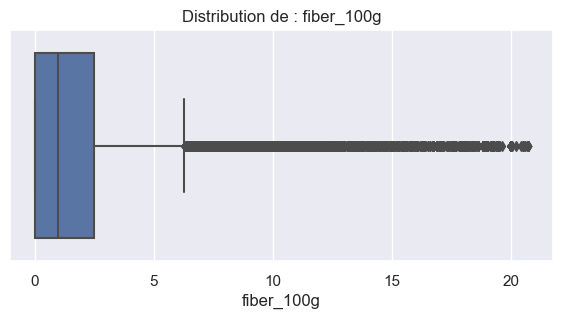

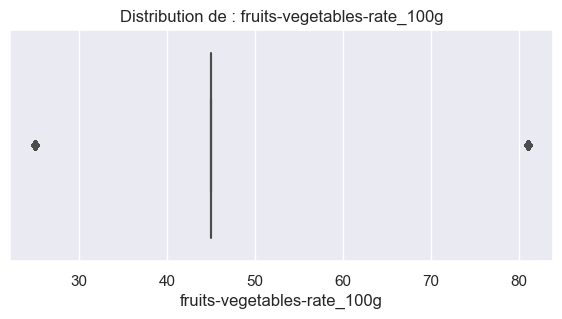

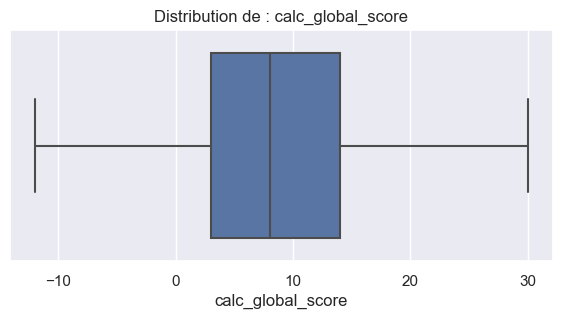

In [142]:
numeric_columns = data_ana.select_dtypes(include = ['int32','float64','int64']).columns
#sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (7,3))
    
    sns.boxplot(data_ana[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

### Barplots

In [143]:
categories_columns = data_ana.select_dtypes(include = ['category']).columns

In [144]:
categories_columns

Index([], dtype='object')

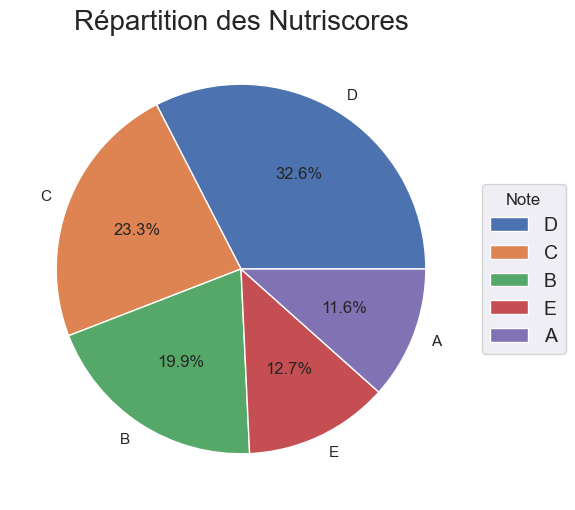

In [145]:
plt.figure(figsize=(6,6))

plt.title('Répartition des Nutriscores', size=20)
#wedges, texts, autotexts = plt.pie(data_ana.nutrition_grade_fr.value_counts().values, 

wedges, texts, autotexts = plt.pie(data_ana.calc_nutriscore .value_counts().values, 
        labels = data_ana.calc_nutriscore.value_counts().index.str.upper(),
       autopct='%1.1f%%')

ax = plt.gca()

#ax.legend(wedges, data_ana.nutrition_grade_fr.value_counts().index.str.upper(),

ax.legend(wedges, data_ana.calc_nutriscore.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

### Additifs

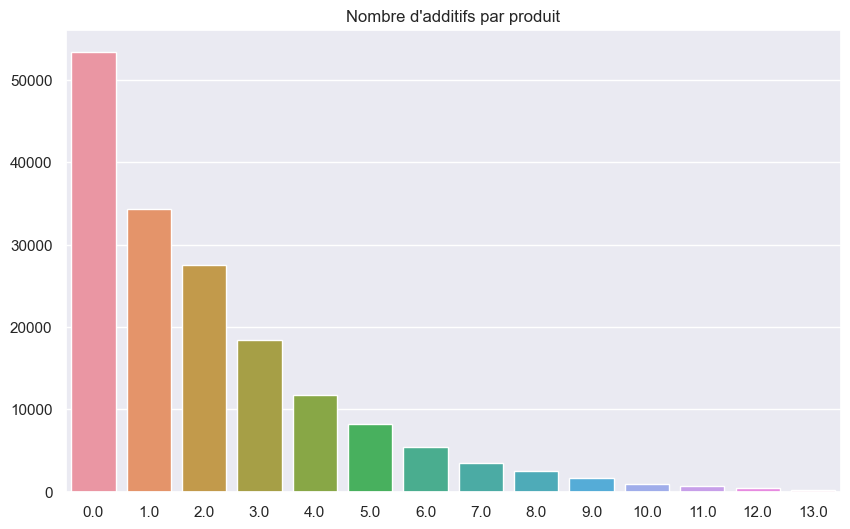

In [146]:
plt.figure(figsize=(10,6))
plt.title('Nombre d\'additifs par produit')
sns.barplot(x = data_ana.additives_n.value_counts().index,
           y = data_ana.additives_n.value_counts().values )
plt.show()

<div class="alert alert-info">
    <h1 style="font-size:25px;"><strong>02. Analyses Bivariée</strong></h1>
</div>

## Median des quelques _100g

In [147]:
data_ana[['energy_100g',
      'fat_100g',
      'saturated-fat_100g',
      'carbohydrates_100g',
      'sugars_100g',
      'fiber_100g',
      'proteins_100g',
      'salt_100g',
      'sodium_100g',
      'nutrition-score-fr_100g',
      'calc_global_score']
    ].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,calc_global_score
count,189590.000000,189590.000000,189590.000000,189590.000000,189590.000000,189590.000000,189590.000000,189590.000000,189590.000000,157590.000000,189590.000000
mean,1173.558648,13.155236,5.156561,32.489628,17.769646,2.003084,6.901639,1.278906,0.496820,11.451317,9.080748
std,767.439249,15.922208,6.442385,28.305708,21.913568,2.893907,7.710484,2.477649,0.972316,7.757161,8.022043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-12.000000
25%,467.000000,0.100000,0.000000,6.670000,1.700000,0.000000,0.500000,0.100000,0.039370,4.000000,3.000000
50%,1179.000000,7.320000,2.830000,26.400000,7.500000,1.000000,4.600000,0.741680,0.288000,12.000000,8.000000
75%,1728.000000,21.400000,7.200000,57.140000,27.600000,2.500000,10.000000,1.541780,0.600000,17.000000,14.000000
max,5205.000000,98.500000,44.440000,100.000000,100.000000,20.700000,45.830000,34.150000,13.444882,40.000000,30.000000


In [148]:
data_ana[['energy_100g', 
 'proteins_100g', 
 'salt_100g', 
 'sodium_100g',
 'additives_n', 
 'sugars_100g', 
 'fat_100g', 
 'carbohydrates_100g',
 'saturated-fat_100g', 
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g', 
 'fiber_100g',
 'calc_global_score']].describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,calc_global_score
count,189590.000000,189590.000000,189590.000000,189590.000000,169035.000000,189590.000000,189590.000000,189590.000000,189590.000000,157590.000000,157590.000000,189590.000000,189590.000000
mean,1173.558648,6.901639,1.278906,0.496820,2.073434,17.769646,13.155236,32.489628,5.156561,11.451317,11.378730,2.003084,9.080748
std,767.439249,7.710484,2.477649,0.972316,2.340267,21.913568,15.922208,28.305708,6.442385,7.757161,7.881656,2.893907,8.022043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-12.000000
25%,467.000000,0.500000,0.100000,0.039370,0.000000,1.700000,0.100000,6.670000,0.000000,4.000000,4.000000,0.000000,3.000000
50%,1179.000000,4.600000,0.741680,0.288000,1.000000,7.500000,7.320000,26.400000,2.830000,12.000000,12.000000,1.000000,8.000000
75%,1728.000000,10.000000,1.541780,0.600000,3.000000,27.600000,21.400000,57.140000,7.200000,17.000000,18.000000,2.500000,14.000000
max,5205.000000,45.830000,34.150000,13.444882,13.000000,100.000000,98.500000,100.000000,44.440000,40.000000,40.000000,20.700000,30.000000


<div class="alert alert-info">
    <font id="section_3">
   <h1 style="font-size:25px;"></strong> 03. Analyses Multivariée</strong></h1>
</div>

<div class="alert alert-info">
    <h1 style="font-size:25px;"><strong>3.1 Matrice de corrélation</strong></h1>
</div>

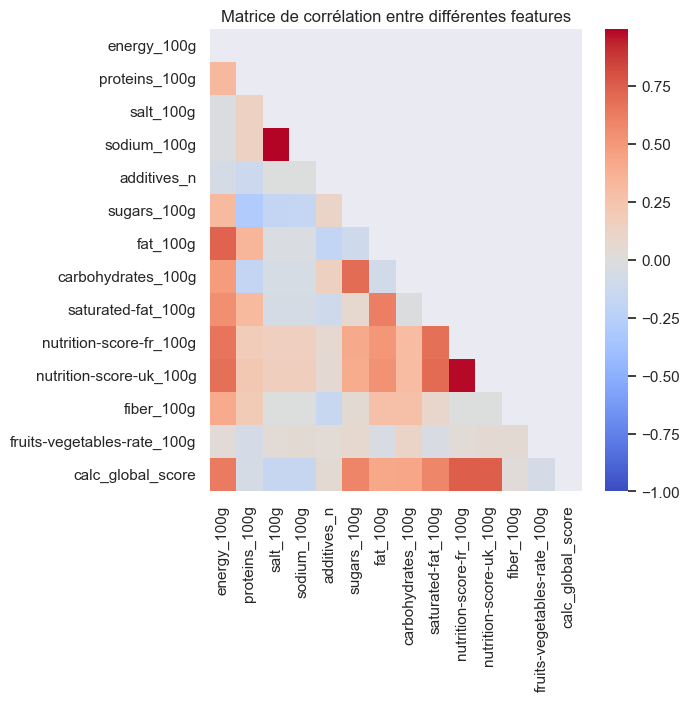

In [149]:
plt.figure(figsize=(6,6))
plt.title('Matrice de corrélation entre différentes features')

corr = data_ana[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)


Analyse du tableau :

* additives_n : pas de correlation remarquable
* additives_tags : pas de correlation remarquable


* energy_100g : forte corrélation avec:
    * fat_100g
    * saturated-fat_100g
    * carbohydrates_100g
    * nutrition-score-fr_100g

* fat_100g et saturated-fat_100g fortement corrélés

* nutrition-score-uk_100g : ont corrélation avec:
    * saturated_fat_100g
    * fiber_100g
    
* fiber_100g et trans-fat_100g ont corrélation  

In [150]:
object_columns = data_ana.select_dtypes(include = ['object']).columns

In [151]:
object_columns

Index(['code', 'states_fr', 'countries_fr', 'nutrition_grade_fr',
       'pnns_groups_2', 'pnns_groups_1', 'categories_fr', 'main_category_fr',
       'calc_nutriscore'],
      dtype='object')

## Le test du CHI2
conduit à rejeter l'hypothèse d'indépendance pour toutes nos variables : nous pouvons donc en conclure qu'il existe une relation entre la valeur du nutriscore et la valeur des variables.

In [152]:
data_ana.select_dtypes(include = ['int32','float64','int64']).columns

Index(['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'additives_n', 'sugars_100g', 'fat_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'fiber_100g', 'fruits-vegetables-rate_100g',
       'calc_global_score'],
      dtype='object')

In [153]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def test_chi2(serie1, serie2):
    
    alpha = 0.03    
    
    #H0 : les variables sont indépendantes
    
    #print('tableau de contingence :\n', pd.crosstab(serie1.array, serie2.array))
    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
    print('chi2 : {0:.5f},\np : {0:.5f},\ndof : {0:.5f}\n'.format(stat_chi2, p, dof))
    #print('tableau de contingence : \n', tab_contingence)
    
    critical = chi2.ppf(1-alpha, dof) #
    #print('critital : ', critical)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p, alpha))
        return False
    
    else:
        print('H0 non rejetée car p = {} >= alpha = {}'.format(p, alpha))
        return True

In [154]:
tags = data_ana.columns[data_ana.columns.str.contains('_tag')].tolist()

In [155]:
import seaborn as sns
x = pd.cut(data_ana['nutrition-score-fr_100g'], 20)
for column in data_ana.select_dtypes(include = ['int32','float64','int32']).columns:
    print('test d\'indépendance {} / {}'.format('nutriscore',column))
    if data_ana[column].nunique() > 20 :
        y = pd.cut(data_ana[column], 20).astype('category')
    else:
        y = data_ana[column].astype('category')
    test_chi2(x, y)
    
    print('________________________________________________________________________________________________\n')

test d'indépendance nutriscore / energy_100g
chi2 : 123795.14241,
p : 123795.14241,
dof : 123795.14241

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / proteins_100g
chi2 : 29527.19849,
p : 29527.19849,
dof : 29527.19849

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / salt_100g
chi2 : 18322.84963,
p : 18322.84963,
dof : 18322.84963

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / sodium_100g
chi2 : 18319.04650,
p : 18319.04650,
dof : 18319.04650

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
_______________________

In [156]:
tags

[]

In [157]:
data_ana[tags].sample(5)

""
138419
22810
180560
19254
179622


<div class="alert alert-info">
    <font id="section_4">
    <h1 style="font-size:25px;"><strong>04. Analyse en Composantes Principales (ACP)</strong></h1>
</div>

## 4.1 Data selection

In [158]:
data_num = data_ana[numeric_columns]
data_num.head(200)

,energy_100g,proteins_100g,salt_100g,sodium_100g,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,fruits-vegetables-rate_100g,calc_global_score
0,1717.000000,3.000000,1.700000,0.669291,2.0,49.300000,10.900,73.50,7.000000,28.0,28.0,1.000,25,26
1,1898.000000,8.500000,1.752600,0.690000,1.0,2.000000,15.500,68.00,1.300000,9.0,9.0,3.000,25,8
2,1637.000000,7.600000,0.381000,0.150000,3.0,55.300000,3.200,81.00,0.900000,13.0,13.0,1.500,25,11
3,2320.000000,8.100000,0.350000,0.137795,1.0,47.000000,35.500,48.50,15.000000,23.0,23.0,3.300,25,23
4,159.000000,1.800000,1.016000,0.400000,3.0,0.400000,0.800,5.50,0.300000,3.0,3.0,0.700,45,-4
5,1046.000000,17.100000,0.700000,0.275591,1.0,0.900000,20.100,0.90,4.140000,5.0,5.0,0.000,25,5
6,915.000000,13.500000,2.300000,0.905512,0.0,0.300000,17.300,2.20,3.360000,15.0,15.0,0.000,25,5
7,1642.000000,10.900000,0.600000,0.236220,0.0,0.600000,37.900,2.90,12.090000,16.0,16.0,1.400,25,8
8,1962.000000,6.000000,0.558800,0.220000,4.0,36.100000,18.000,70.30,10.300000,22.0,22.0,2.400,25,26
9,201.000000,0.300000,0.007620,0.003000,0.0,10.500000,0.100,12.40,0.020000,14.0,2.0,0.500,25,5


In [159]:
data_num.shape

(189590, 14)

In [160]:
data_num.isna().mean()

energy_100g                    0.000000
proteins_100g                  0.000000
salt_100g                      0.000000
sodium_100g                    0.000000
additives_n                    0.108418
sugars_100g                    0.000000
fat_100g                       0.000000
carbohydrates_100g             0.000000
saturated-fat_100g             0.000000
nutrition-score-fr_100g        0.168785
nutrition-score-uk_100g        0.168785
fiber_100g                     0.000000
fruits-vegetables-rate_100g    0.000000
calc_global_score              0.000000
dtype: float64

In [161]:
deleted_features3 =[
 'additives_n',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g'
  ]
data_num.drop(deleted_features3, axis=1, inplace=True)

In [162]:
data_num.shape

(189590, 11)

In [163]:
data_num.isna().mean()

energy_100g                    0.0
proteins_100g                  0.0
salt_100g                      0.0
sodium_100g                    0.0
sugars_100g                    0.0
fat_100g                       0.0
carbohydrates_100g             0.0
saturated-fat_100g             0.0
fiber_100g                     0.0
fruits-vegetables-rate_100g    0.0
calc_global_score              0.0
dtype: float64

In [164]:
X = data_num.values
X[:5]

array([[ 1.71700000e+03,  3.00000000e+00,  1.70000000e+00,
         6.69291339e-01,  4.93000000e+01,  1.09000000e+01,
         7.35000000e+01,  7.00000000e+00,  1.00000000e+00,
         2.50000000e+01,  2.60000000e+01],
       [ 1.89800000e+03,  8.50000000e+00,  1.75260000e+00,
         6.90000000e-01,  2.00000000e+00,  1.55000000e+01,
         6.80000000e+01,  1.30000000e+00,  3.00000000e+00,
         2.50000000e+01,  8.00000000e+00],
       [ 1.63700000e+03,  7.60000000e+00,  3.81000000e-01,
         1.50000000e-01,  5.53000000e+01,  3.20000000e+00,
         8.10000000e+01,  9.00000000e-01,  1.50000000e+00,
         2.50000000e+01,  1.10000000e+01],
       [ 2.32000000e+03,  8.10000000e+00,  3.50000000e-01,
         1.37795276e-01,  4.70000000e+01,  3.55000000e+01,
         4.85000000e+01,  1.50000000e+01,  3.30000000e+00,
         2.50000000e+01,  2.30000000e+01],
       [ 1.59000000e+02,  1.80000000e+00,  1.01600000e+00,
         4.00000000e-01,  4.00000000e-01,  8.00000000e-01,
  

In [165]:
type(X)

numpy.ndarray

La forme de cette matrice est conforme à nos attentes :

In [166]:
X.shape

(189590, 11)

In [167]:
names = data_num.index
names

RangeIndex(start=0, stop=189590, step=1)

In [168]:
features = data_num.columns
features

Index(['energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g',
       'fiber_100g', 'fruits-vegetables-rate_100g', 'calc_global_score'],
      dtype='object')

In [169]:
scaler = StandardScaler()

In [170]:
scaler.fit(X)

StandardScaler()

In [171]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 0.70812483, -0.50601866,  0.16995757,  0.17738287,  1.43885458,
        -0.1416413 ,  1.44884139,  0.28614305, -0.34662031, -1.98740854,
         2.10910081],
       [ 0.94397474,  0.20729769,  0.19118743,  0.19868122, -0.71963121,
         0.14726411,  1.25453378, -0.59862485,  0.34448872, -1.98740854,
        -0.13472264],
       [ 0.60388177,  0.0905732 , -0.36240333, -0.35669542,  1.71265828,
        -0.62524385,  1.71380632, -0.66071383, -0.17384305, -1.98740854,
         0.23924793],
       [ 1.49385684,  0.15542014, -0.37491522, -0.36924767,  1.3338965 ,
         1.4033746 ,  0.56562496,  1.52792256,  0.44815508, -1.98740854,
         1.73513024],
       [-1.32200865, -0.66165132, -0.10611131, -0.09957661, -0.79264553,
        -0.7759771 , -0.9535073 , -0.75384729, -0.45028666,  0.48759974,
        -1.63060495]])

In [172]:
X_scaled = scaler.fit_transform(X)

In [173]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 4.2 PCA

Nous allons travailler que sur les 6 premières composantes :

In [174]:
n_components = 6

In [175]:
pca = PCA(n_components=n_components)

In [176]:
import numpy as np
import pandas as pd

# Verificar si hay valores faltantes en X_scaled
print(np.isnan(X_scaled).any())
print(pd.isnull(X_scaled).any())

False
False


On l'entraine sur les données scalées :

In [177]:
pca.fit(X_scaled)

PCA(n_components=6)

## 4.3 Explained variance & scree plot

Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_

In [178]:
pca.explained_variance_ratio_

array([0.29531174, 0.20842935, 0.16437782, 0.10579049, 0.08674053,
       0.05712375])

Ici la 1ère composante capte 44% de la variance de nos données initiales, la 2ème 20% etc etc.

Enregistrons cela dans une variable :

In [179]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([29.53, 20.84, 16.44, 10.58,  8.67,  5.71])

Les 2 premières composantes captent donc 44+20 = 66% de la variance, les 3 premières 44+20+13 = 77% de la variance etc etc.

Dans le jargon, cela s'appelle une somme cumulée. Et pour faire une somme cumulée numpy dispose de la fonction cumsum :

In [180]:
scree_cum = scree.cumsum().round()
scree_cum

array([30., 50., 67., 77., 86., 92.])

Définisons ensuite une variable avec la liste de nos composantes :

In [181]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

On peut enfin l'afficher de façon graphique :

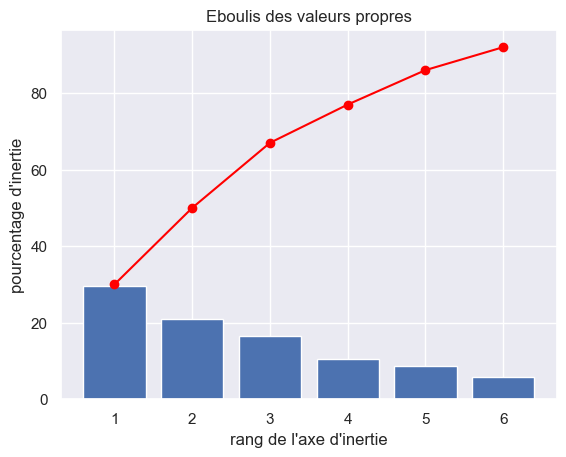

In [182]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

3.4 Components
Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.

La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :

In [183]:
pcs = pca.components_
pcs

array([[ 5.00155100e-01,  1.10766992e-01, -1.37152537e-01,
        -1.36681757e-01,  2.82413509e-01,  3.74690696e-01,
         2.87334195e-01,  3.81861451e-01,  2.06292648e-01,
        -2.12929020e-03,  4.57156453e-01],
       [ 1.56051514e-01,  4.25231778e-01,  4.31200857e-01,
         4.30743418e-01, -3.91167101e-01,  3.32510694e-01,
        -2.85391375e-01,  2.27020385e-01,  1.15146251e-01,
        -4.09029988e-02, -1.08896829e-01],
       [ 7.70795047e-02, -1.79363650e-01,  5.14545381e-01,
         5.15215070e-01,  3.41620426e-01, -2.17198982e-01,
         4.34111843e-01, -1.83866047e-01,  7.32544419e-02,
         1.82432175e-01,  8.30450059e-02],
       [ 1.14586812e-01,  2.05082733e-01, -1.53210393e-01,
        -1.52790502e-01, -1.13683698e-01, -1.24935473e-02,
         1.93912828e-01, -2.92216899e-01,  7.03922725e-01,
         3.49255612e-01, -3.80043306e-01],
       [-2.06875876e-02, -1.13386607e-01, -2.53932465e-02,
        -1.88285754e-02, -4.50788026e-02,  1.12825948e-01,
  

Affichons la même chose mais version pandas :

In [184]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10
0,0.500155,0.110767,-0.137153,-0.136682,0.282414,0.374691,0.287334,0.381861,0.206293,-0.002129,0.457156
1,0.156052,0.425232,0.431201,0.430743,-0.391167,0.332511,-0.285391,0.227020,0.115146,-0.040903,-0.108897
2,0.077080,-0.179364,0.514545,0.515215,0.341620,-0.217199,0.434112,-0.183866,0.073254,0.182432,0.083045
3,0.114587,0.205083,-0.153210,-0.152791,-0.113684,-0.012494,0.193913,-0.292217,0.703923,0.349256,-0.380043
4,-0.020688,-0.113387,-0.025393,-0.018829,-0.045079,0.112826,-0.157329,0.196186,-0.283360,0.908775,0.039345
5,0.000548,-0.812712,0.063738,0.067916,-0.196704,0.351422,-0.196132,-0.002607,0.350552,-0.077240,0.036136


Intéressant... Mais pas encore très clair... Continuons le travail :

In [185]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,proteins_100g,salt_100g,sodium_100g,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,fruits-vegetables-rate_100g,calc_global_score
F1,0.50,0.11,-0.14,-0.14,0.28,0.37,0.29,0.38,0.21,-0.00,0.46
F2,0.16,0.43,0.43,0.43,-0.39,0.33,-0.29,0.23,0.12,-0.04,-0.11
F3,0.08,-0.18,0.51,0.52,0.34,-0.22,0.43,-0.18,0.07,0.18,0.08
F4,0.11,0.21,-0.15,-0.15,-0.11,-0.01,0.19,-0.29,0.70,0.35,-0.38
F5,-0.02,-0.11,-0.03,-0.02,-0.05,0.11,-0.16,0.20,-0.28,0.91,0.04
F6,0.00,-0.81,0.06,0.07,-0.20,0.35,-0.20,-0.00,0.35,-0.08,0.04


In [186]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.500155,0.156052,0.077080,0.114587,-0.020688,0.000548
proteins_100g,0.110767,0.425232,-0.179364,0.205083,-0.113387,-0.812712
salt_100g,-0.137153,0.431201,0.514545,-0.153210,-0.025393,0.063738
sodium_100g,-0.136682,0.430743,0.515215,-0.152791,-0.018829,0.067916
sugars_100g,0.282414,-0.391167,0.341620,-0.113684,-0.045079,-0.196704
fat_100g,0.374691,0.332511,-0.217199,-0.012494,0.112826,0.351422
carbohydrates_100g,0.287334,-0.285391,0.434112,0.193913,-0.157329,-0.196132
saturated-fat_100g,0.381861,0.227020,-0.183866,-0.292217,0.196186,-0.002607
fiber_100g,0.206293,0.115146,0.073254,0.703923,-0.283360,0.350552
fruits-vegetables-rate_100g,-0.002129,-0.040903,0.182432,0.349256,0.908775,-0.077240


Et pour une représentation plus visuelle, comme cela :

<AxesSubplot:>

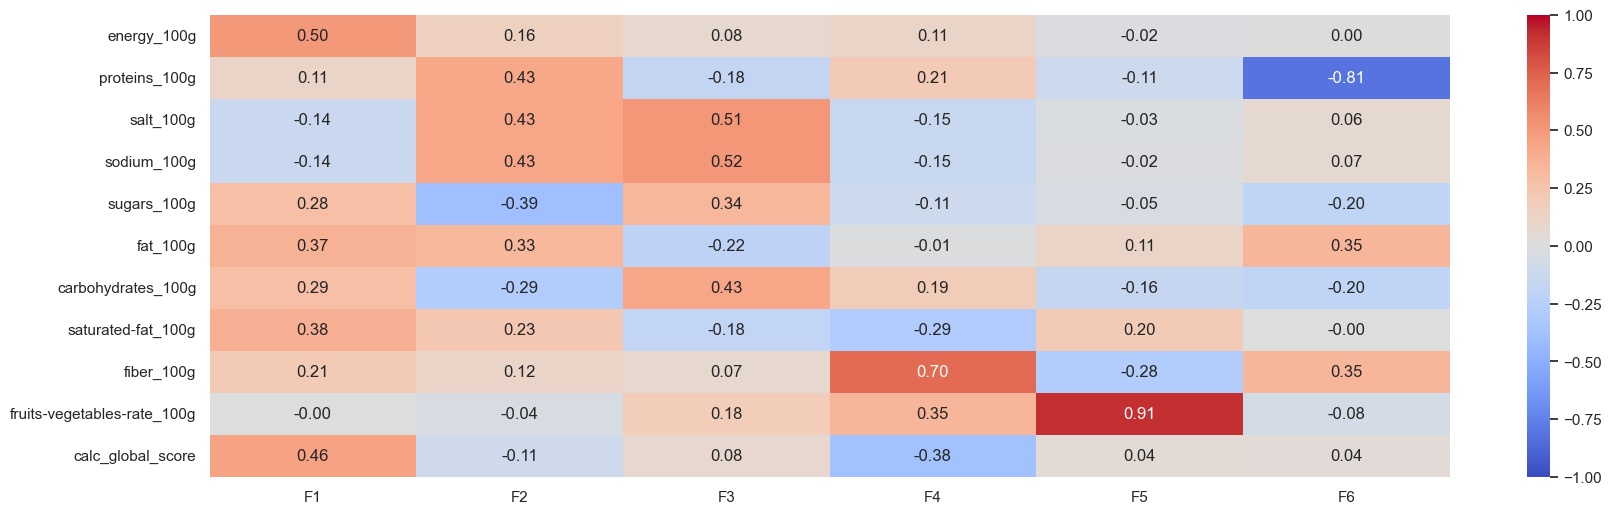

In [187]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

3.5 Correlation graph
Bon, pour le graphe des corrélations, on va tricher un peu...

Je vais vous donner du code clé en main. Charge à vous de le comprendre ou de le copier sans vergogne :)

Même si vous ne comprenez pas tout, essayez de lire au moins une fois le code, à la volée. On ne sait jamais...

Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :

In [188]:
x, y = 0,1

Pour la partie graphique :

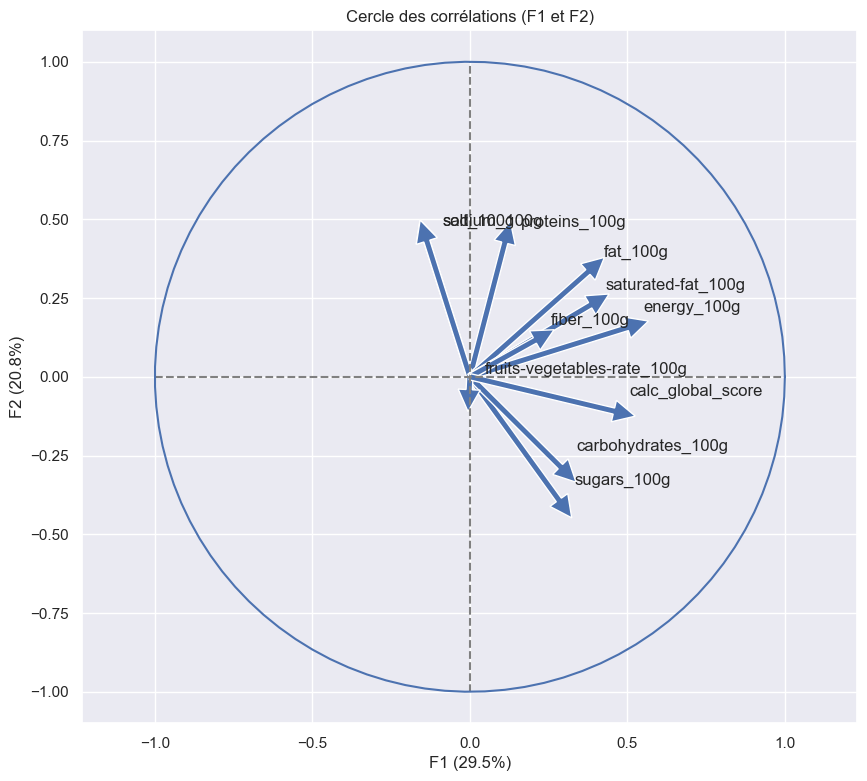

In [189]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
#plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.xlabel('F{} ({}%)'.format(str(x+1), round(100*pca.explained_variance_ratio_[x],1)))

plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

On peut en faire une fonction :

In [190]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [191]:
x_y = (0,1)
x_y

(0, 1)

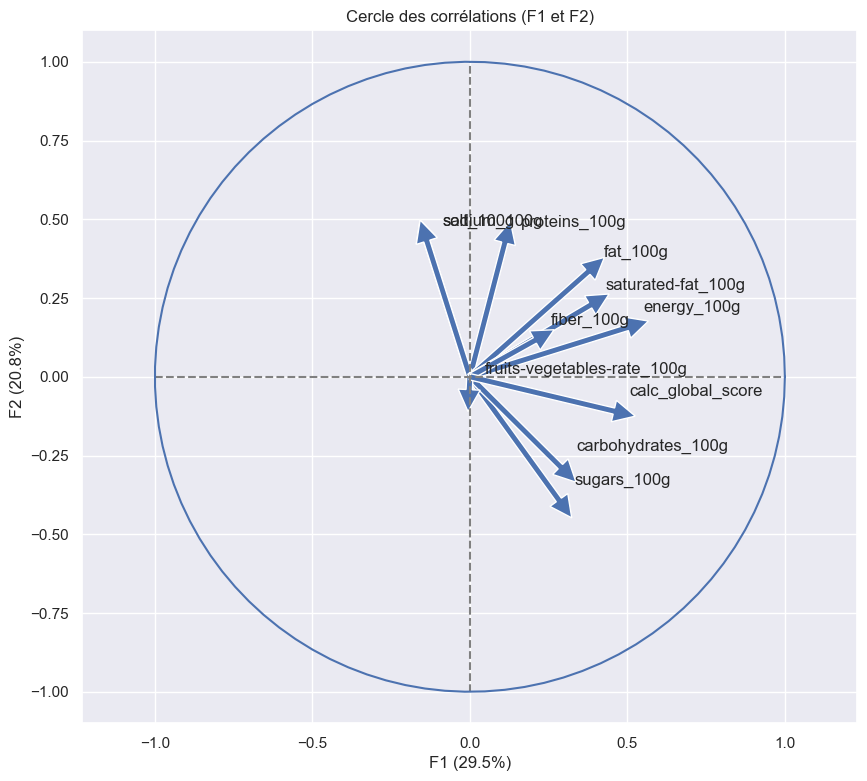

In [192]:
correlation_graph(pca, x_y, features)

Essayons pour F3 et F4 :

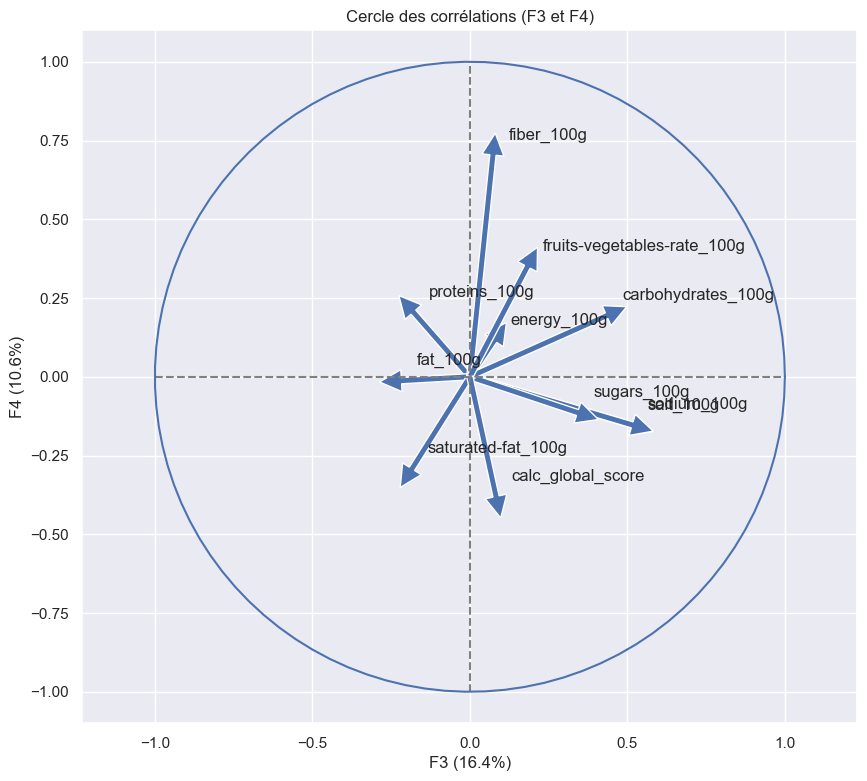

In [193]:
correlation_graph(pca, (2,3), features)

### 4.4 Projection
Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [194]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 2.02633153, -1.10173071,  1.2100297 , -1.77990436, -1.84248711,
        -0.07498483],
       [ 0.43924913,  0.37563727,  0.26464604,  0.188781  , -2.22641271,
         0.07593668],
       [ 0.97780713, -1.6588782 ,  0.8909677 , -0.37110376, -2.30128105,
        -0.9104119 ],
       [ 3.40469431,  0.05274332, -0.36604168, -1.22714122, -1.5879087 ,
         0.31471609],
       [-2.62215108, -0.31750905, -0.5461356 ,  0.35251932,  0.56379867,
         0.34124634]])

In [195]:
x_y

(0, 1)

Accrochez vous, car voici la fonction.

Pour info, sachez que nous reviendrons dessus lors du TP de la 3e partie. Pas besoin de trop rentrer dans le détail pour l'instant, mais lisez la quand même le code, au moins une fois, en diagonale...

In [196]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



Essayons la version simple avec F1 et F2, les couleurs correspondent au niveau de difficulté :

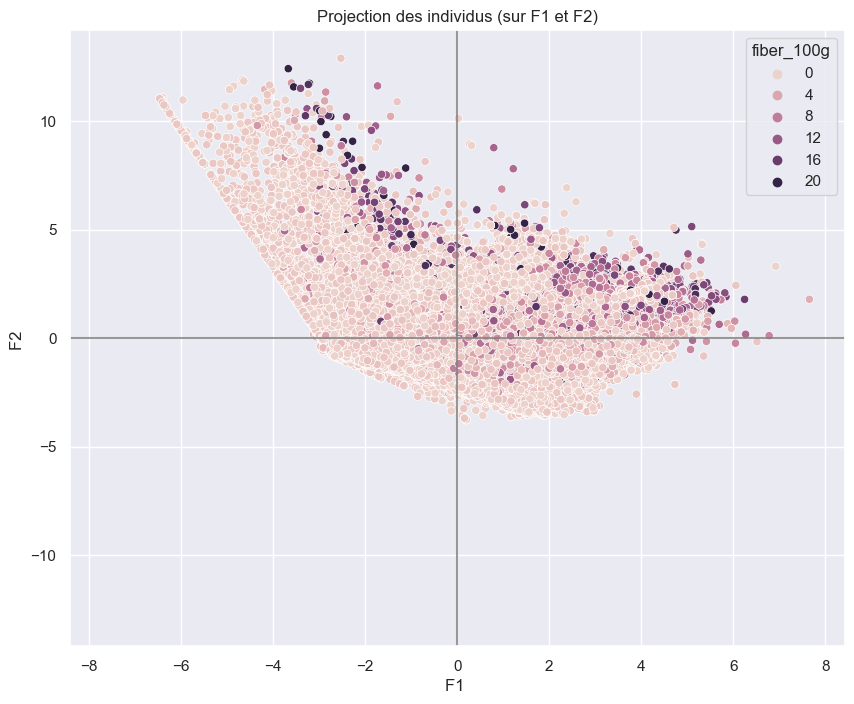

In [197]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=data_num['fiber_100g'])

Intéressant, mais il manque quelques éléments...

Essayons la version plus élaborée avec F1 et F2 :

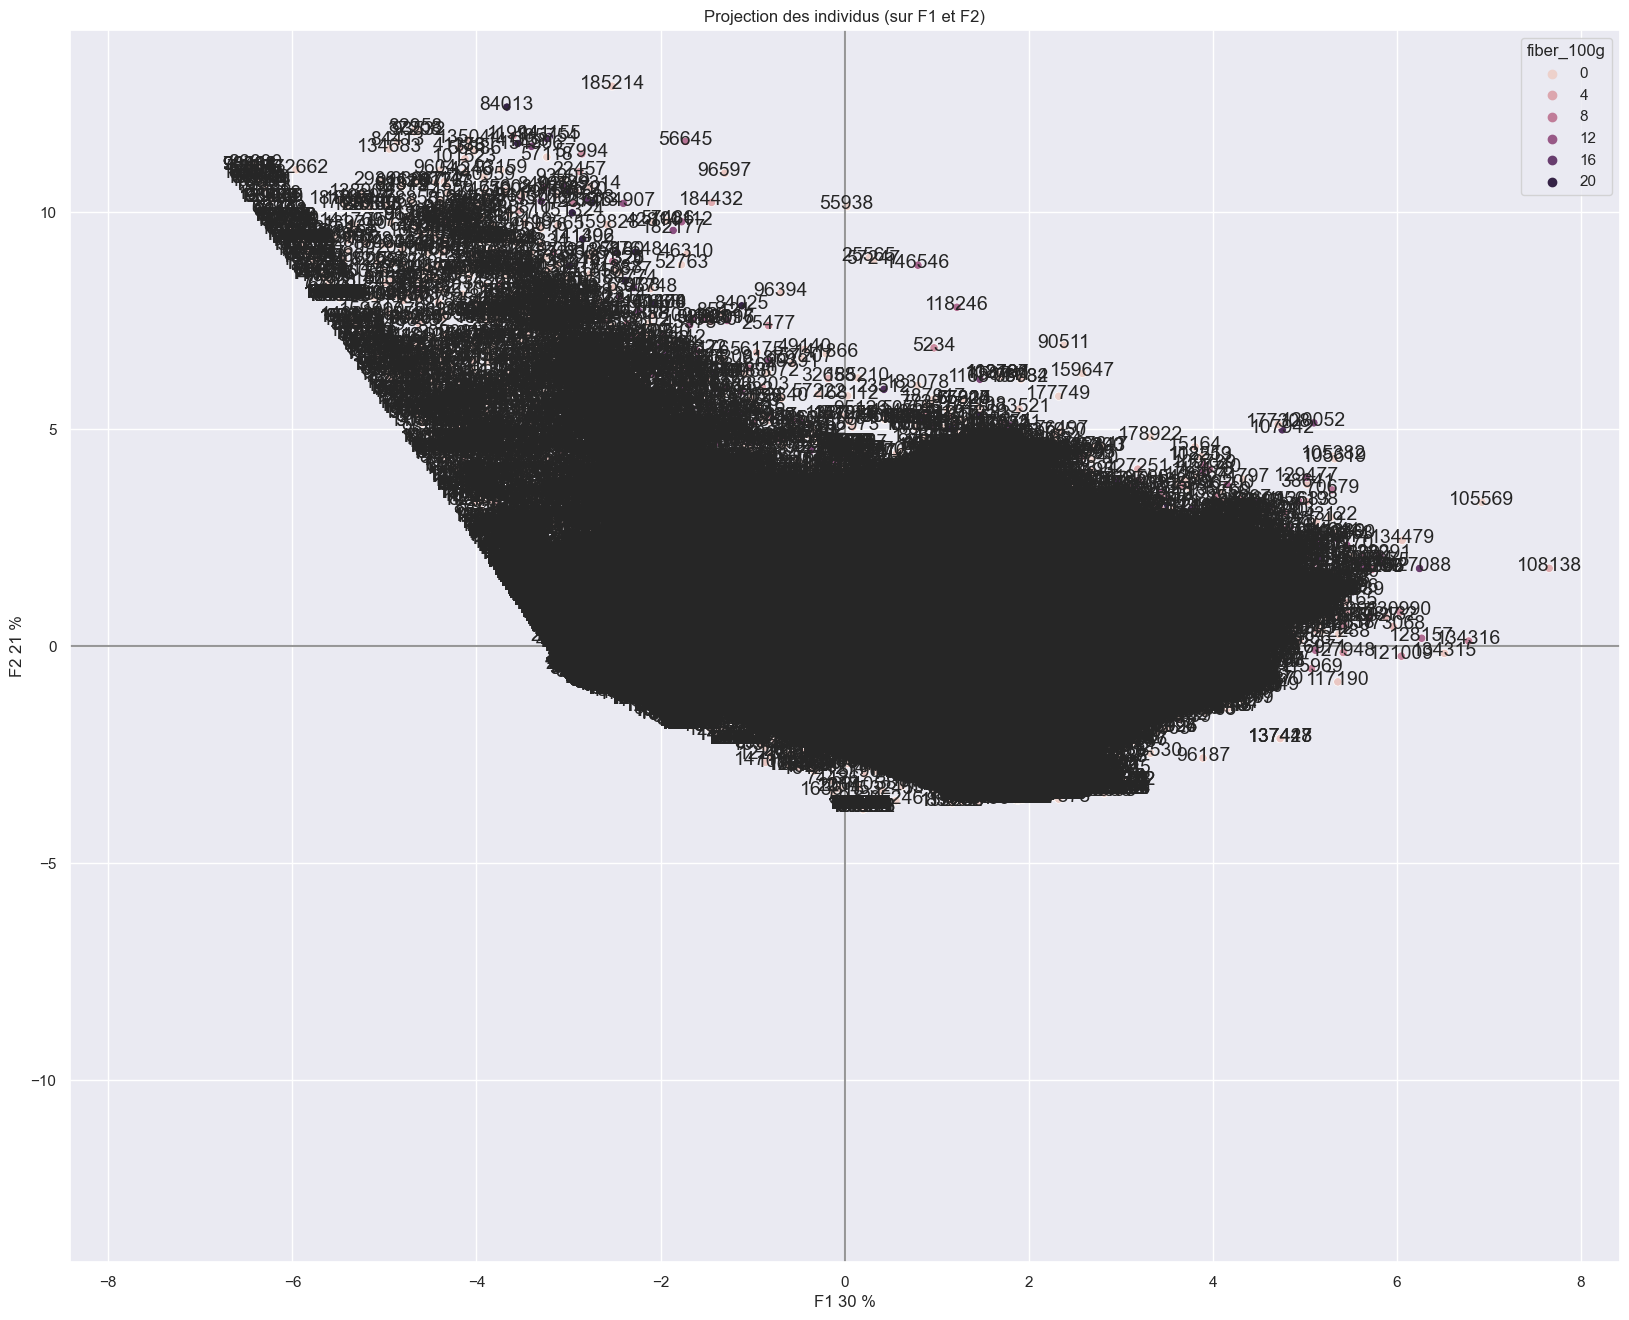

In [198]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=data_num['fiber_100g'], marker="o")

Beaucoup mieux !

Essayons avec F2 et F3 :

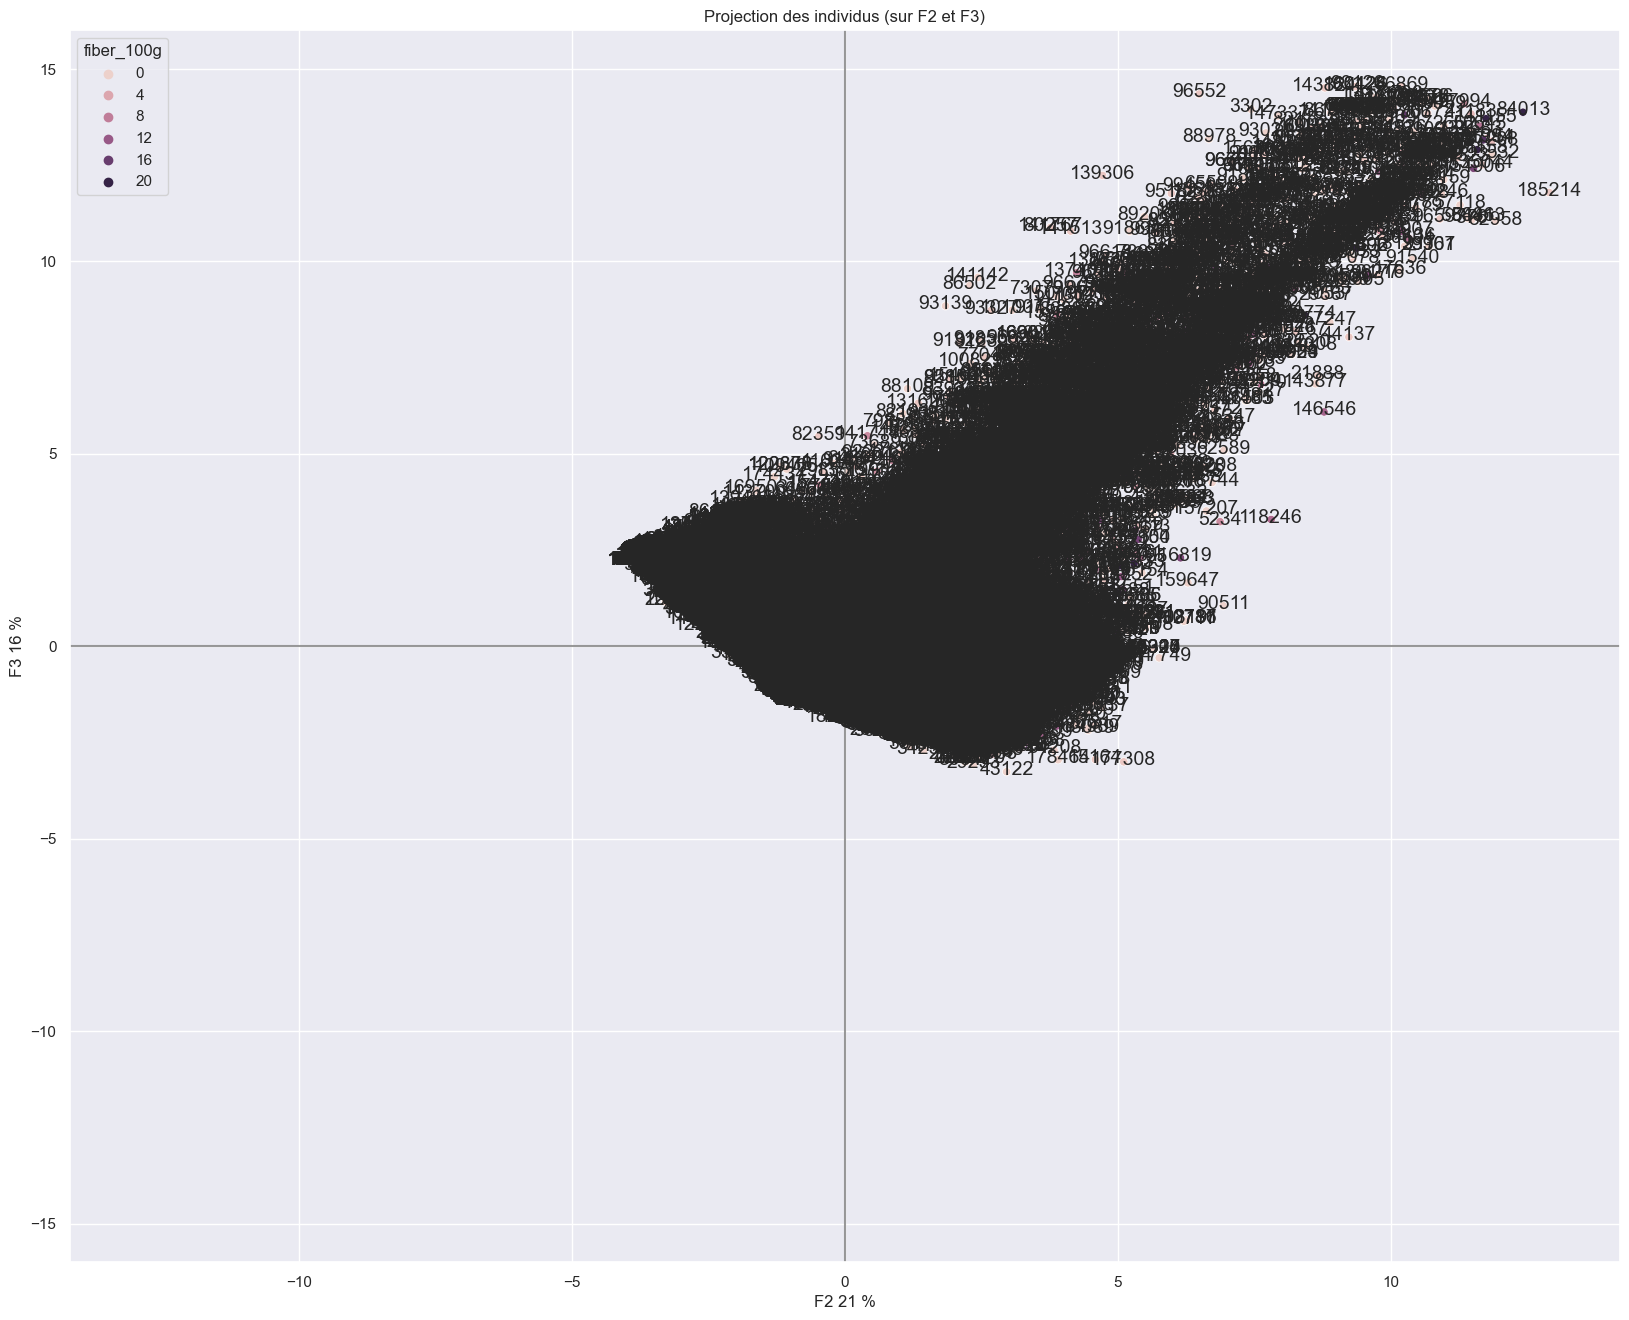

In [199]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=data_num['fiber_100g'],marker="o")

<div class="alert alert-info">
    <font id="section_5">
    <h1 style="font-size:25px;"><strong>05. Analyse exploratoire avec l'ANOVA</strong></h1>
</div>

(Analyse de la variance) -  Indépendance des variables

Est-ce que les variables quantitatives suivent une distribution normale ? Cette hypothèse doit être validée afin de pouvoir appliquer le test d'indépendance par l'analyse de la variance ADOMA.

**A : test de normalité d'Agostino & Pearson**

In [200]:
?stats.normaltest

In [201]:
data_ana[numeric_columns].head()

,energy_100g,proteins_100g,salt_100g,sodium_100g,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,fruits-vegetables-rate_100g,calc_global_score
0,1717.0,3.0,1.7000,0.669291,2.0,49.3,10.9,73.5,7.0,28.0,28.0,1.0,25,26
1,1898.0,8.5,1.7526,0.690000,1.0,2.0,15.5,68.0,1.3,9.0,9.0,3.0,25,8
2,1637.0,7.6,0.3810,0.150000,3.0,55.3,3.2,81.0,0.9,13.0,13.0,1.5,25,11
3,2320.0,8.1,0.3500,0.137795,1.0,47.0,35.5,48.5,15.0,23.0,23.0,3.3,25,23
4,159.0,1.8,1.0160,0.400000,3.0,0.4,0.8,5.5,0.3,3.0,3.0,0.7,45,-4


In [7]:
from scipy import stats
numeric_columns = data_ana.select_dtypes(include = ['int32','float64','int64']).columns
numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(data_ana[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))
        

________
proteins_100g
p = 0
H0 est rejetée : proteins_100g n'est pas de distribution normale
________
salt_100g
p = 0
H0 est rejetée : salt_100g n'est pas de distribution normale
________
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'est pas de distribution normale
________
additives_n
p = 0
H0 est rejetée : additives_n n'est pas de distribution normale
________
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
fat_100g
p = 0
H0 est rejetée : fat_100g n'est pas de distribution normale
________
carbohydrates_100g
p = 0
H0 est rejetée : carbohydrates_100g n'est pas de distribution normale
________
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
________
nutrition-score-fr_100g
p = 0
H0 est rejetée : nutrition-score-fr_100g n'est pas de distribution normale
________
nutrition-score-uk_100g
p = 0
H0 est rejetée : nutrition-score-uk_100g n'est pas de distribution normale
________
fiber_100g
p = 0
H0 e

On ne peut pas appliquer le test Anova car **skewtest n'est pas valide avec moins de 8 échantillons ; 13 échantillons ont été donnés**


Même si les données ne suivent pas une distribution normale, voici comment préparer les opérations pour appliquer le test d'indépendance par l'analyse de la variance ADOMA :

1. Divisez les données en groupes en fonction des catégories de la variable que vous voulez tester. Dans cet exemple, vous pouvez diviser les données en fonction du nutrition grade, c'est-à-dire les produits classés de A à E.

2. Calculez la moyenne, l'écart type et la taille de chaque groupe pour la feature salt_100g. Vous pouvez utiliser un logiciel statistique comme R ou Python pour effectuer ces calculs.

3. Effectuez le test d'indépendance par l'analyse de la variance ADOMA en utilisant les moyennes, les écarts types et les tailles des groupes calculés dans l'étape précédente. Ce test permettra de déterminer si la variable salt_100g diffère significativement entre les différents groupes de nutrition grade.

4. Interprétez les résultats du test pour déterminer s'il y a une relation significative entre la variable salt_100g et le nutrition grade.

**B. Test de normalité Kolmogorov Smirnov**

In [203]:
from scipy import stats
numeric_columns = data_ana.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(data_ana[column].dropna(), 
                     'norm', 
                     args=(data_ana[column].mean(), data_ana[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected : {} is not from a normal distribution".format(column))
    else:
        print("The null hypothesis cannot be rejected")

________
proteins_100g
p = 0.0
The null hypothesis can be rejected : proteins_100g is not from a normal distribution
________
salt_100g
p = 0.0
The null hypothesis can be rejected : salt_100g is not from a normal distribution
________
sodium_100g
p = 0.0
The null hypothesis can be rejected : sodium_100g is not from a normal distribution
________
additives_n
p = 0.0
The null hypothesis can be rejected : additives_n is not from a normal distribution
________
sugars_100g
p = 0.0
The null hypothesis can be rejected : sugars_100g is not from a normal distribution
________
fat_100g
p = 0.0
The null hypothesis can be rejected : fat_100g is not from a normal distribution
________
carbohydrates_100g
p = 0.0
The null hypothesis can be rejected : carbohydrates_100g is not from a normal distribution
________
saturated-fat_100g
p = 0.0
The null hypothesis can be rejected : saturated-fat_100g is not from a normal distribution
________
nutrition-score-fr_100g
p = 0.0
The null hypothesis can be reject

Le test de Kolmogorov Smirnov confirme la non normalité des distributions de données : on ne peut appliquer l'analyse de la variance

**C. ANOVA : analyse de la variance**

Même si les données ne suivent pas une distribution normale, préparons les opérations pour appliquer le test si c'était le cas, à but d'apprentissage

il faut fournir en entrée au test les données pour chaque groupe, regardons un exemple d'application pour le nutrition grade et la feature salt_100g

In [204]:
data_ana['nutrition_grade_fr'].dropna().unique().tolist()

['e', 'c', 'd', 'b', 'a']

In [205]:
from scipy import stats

data_a = data_ana[data_ana['nutrition_grade_fr'] == 'a'].select_dtypes(['int32','float64','int64']).dropna(axis=0).dropna(axis=1)
data_b = data_ana[data_ana['nutrition_grade_fr'] == 'b'].select_dtypes(['int32','float64','int64']).dropna(axis=0).dropna(axis=1)
data_c = data_ana[data_ana['nutrition_grade_fr'] == 'c'].select_dtypes(['int32','float64','int64']).dropna(axis=0).dropna(axis=1)
data_d = data_ana[data_ana['nutrition_grade_fr'] == 'd'].select_dtypes(['int32','float64','int64']).dropna(axis=0).dropna(axis=1)
data_e = data_ana[data_ana['nutrition_grade_fr'] == 'e'].select_dtypes(['int32','float64','int64']).dropna(axis=0).dropna(axis=1)

f_statistic, p = stats.f_oneway(
                                    data_b,
                                    data_c,
                                    data_d,
                                    data_e)

In [206]:
pd.DataFrame({'features': data_b.columns.tolist(),
              'p' : p,
              'bool_test' : p<alpha}) 

#si p<alpha : on rejette l'hypothèse d'indépendance H0 : 
#les variables ne sont pas indépendantes

,features,p,bool_test
0,energy_100g,0.000000e+00,True
1,proteins_100g,0.000000e+00,True
2,salt_100g,0.000000e+00,True
3,sodium_100g,0.000000e+00,True
4,additives_n,0.000000e+00,True
5,sugars_100g,0.000000e+00,True
6,fat_100g,0.000000e+00,True
7,carbohydrates_100g,0.000000e+00,True
8,saturated-fat_100g,0.000000e+00,True
9,nutrition-score-fr_100g,0.000000e+00,True


Ce résultat indique que toutes les variables ont une valeur "p" très faible (inférieure au niveau de signification) et une valeur "bool_test" de "True", ce qui suggère que toutes les variables sont liées les unes aux autres et ne sont pas indépendantes. Par conséquent, on peut rejeter l'hypothèse nulle d'indépendance (H0) et conclure que les variables sont liées les unes aux autres.

En général, lorsque la valeur "bool_test" est "True", on peut conclure qu'il y a une relation significative entre les variables dans l'ensemble de données. De plus, étant donné que toutes les valeurs de "p" sont égales à zéro (sauf fruits-vegetables-rate_100g	), on peut conclure que la probabilité que l'hypothèse nulle soit vraie (c'est-à-dire que les variables sont indépendantes) est extrêmement faible. Par conséquent, nous pouvons être assez sûrs qu'il y a une relation entre les variables dans l'ensemble de données.

**Decision**

Le prochain étape de l'analyse dépendra des objectifs de la recherche et des questions que l'on souhaite répondre avec les données. Quelques étapes possibles peuvent être :

* Réaliser une analyse de corrélation pour quantifier l'ampleur et la direction de la relation entre les variables.
* Effectuer une analyse de régression pour modéliser la relation entre une variable dépendante et une ou plusieurs variables indépendantes.
* Effectuer une analyse en composantes principales ou en facteurs pour identifier des motifs ou des regroupements dans les données.
* Effectuer une analyse de classification ou de regroupement pour identifier des groupes ou des catégories dans les données.
* Effectuer une analyse de variance pour comparer les moyennes des variables dans différents groupes ou catégories.
* Effectuer une analyse de survie si l'on dispose de données de temps jusqu'à un événement.
* Effectuer une analyse de séries temporelles si l'on dispose de données recueillies dans le temps.
* Il est important de choisir l'analyse appropriée en fonction des objectifs et des questions de recherche, ainsi que des caractéristiques et de la distribution des données.

**Test de student d'indépendance**

Hypothèses :

* distributions normales => comme vu précédemment cette hypothèse n'est pas acceptable
* variance homogène => on va ramener la variance à 1 pour pouvoir appliquer le test de student
H0 : la moyenne de 2 échantillons de "salt_100g" est la même quel que soit le "nutrition grade"

**de même que précédemment, le test n'est pas applicable faute d'hypothèse de normalité.**

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
data_ana['salt_100g'].dropna()

0         1.700000
1         1.752600
2         0.381000
3         0.350000
4         1.016000
            ...   
189585    1.581780
189586    0.800000
189587    0.100000
189588    0.080000
189589    0.028578
Name: salt_100g, Length: 189590, dtype: float64

In [209]:
scaler = StandardScaler(copy=True, with_mean=False, with_std=True)
a = data_ana[['nutrition-score-fr_100g','salt_100g']].copy().dropna()
b = scaler.fit_transform(a['salt_100g'].values.reshape(-1,1))
a = a['nutrition-score-fr_100g']
a = scaler.fit_transform(a.values.reshape(-1,1))
alpha = 0.05

In [210]:
t_stats, p = stats.ttest_ind(a, b)

In [211]:
p < alpha

array([ True])

Si les distributions suivent une loi normale, alors nous pourrions rejeter l'hypothèse d'indépendance et conclure que la moyenne des échantillons de "salt_100g" est liée à la valeur de "nutrition_grade".


**Élaborer une idée d’application.**

Proposer une application pour exploiter les données d'Open Food Facts en identifiant les caractéristiques nutritionnelles des produits ayant des nutriscores faibles et en étiquetant automatiquement les produits ayant des caractéristiques similaires. Des arguments peuvent être avancés pour justifier la faisabilité (ou non) de cette application, tels que la disponibilité des données pertinentes dans la base de données Open Food Facts, la capacité des algorithmes d'apprentissage automatique à identifier des modèles nutritionnels communs et la possibilité de mettre en œuvre des étiquettes automatiques sur les produits. En outre, l'application pourrait également inclure le calcul automatique du nutriscore et un indicateur pour le nombre d'additifs dans les produits afin de vérifier si ces deux variables sont liées au nutriscore.

## Calcul automatique de nutri score par régression linéaire

In [212]:
data_reg = data_ana[data_ana['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64','int32']).dropna()

In [213]:
data_ana[data_ana['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64','int32']).shape

(157590, 12)

In [214]:
data_ana[data_ana['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64','int32']).dropna(axis=0).shape

(138744, 12)

In [215]:
data_ana[data_ana['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64','int32']).isna().sum().sort_values(ascending=False)

additives_n                18846
energy_100g                    0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
sugars_100g                    0
fat_100g                       0
carbohydrates_100g             0
saturated-fat_100g             0
nutrition-score-fr_100g        0
nutrition-score-uk_100g        0
fiber_100g                     0
dtype: int64

In [216]:
data_reg.shape

(138744, 12)

In [217]:
data_reg.isna().sum()

energy_100g                0
proteins_100g              0
salt_100g                  0
sodium_100g                0
additives_n                0
sugars_100g                0
fat_100g                   0
carbohydrates_100g         0
saturated-fat_100g         0
nutrition-score-fr_100g    0
nutrition-score-uk_100g    0
fiber_100g                 0
dtype: int64

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data_reg.copy()
y = X['nutrition-score-fr_100g']
X = X.drop(['nutrition-score-fr_100g'],axis=1)


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [219]:
#?LinearRegression

In [220]:
lr = LinearRegression().fit(X_train, y_train)
print('R² sur jeu d\'entraînement : ', lr.score(X_train,y_train))
print('R² sur jeu de test', lr.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lr.coef_)
print('ordonnée à l\'origine', lr.intercept_)

R² sur jeu d'entraînement :  0.9688428183226634
R² sur jeu de test 0.967480964897748
Poids de chaque variable dans la régression [ 0.01805688 -0.15071533 -0.65053615  0.62213101  0.03818358  0.11382971
 -0.05286353 -0.11242194 -0.11756771  7.73806074  0.04516976]
ordonnée à l'origine 11.46660744201502


On peut dire que le modèle de régression linéaire est très performant car les coefficients de détermination R² sont élevés, avec un R² de 0,97 pour le jeu de test et un R² de 0,97 pour le jeu d'entraînement. De plus, les poids de chaque variable dans la régression sont significatifs, ce qui indique que les variables ont une influence sur la variable cible. La constante de la régression est également significative, avec une ordonnée à l'origine de 11,47. En résumé, on peut dire que la régression linéaire explique très bien la variation de la variable cible en fonction des variables indépendantes et est donc un bon modèle pour la prédiction.

In [221]:
resultat = pd.DataFrame({'nutriscore_reel' : y_test, 'prediction' : lr.predict(X_test)}).reset_index()

In [222]:
resultat.head()

,index,nutriscore_reel,prediction
0,141759,12.0,11.991587
1,62498,0.0,0.519550
2,65635,11.0,11.447803
3,167514,3.0,3.190594
4,136168,8.0,8.105656


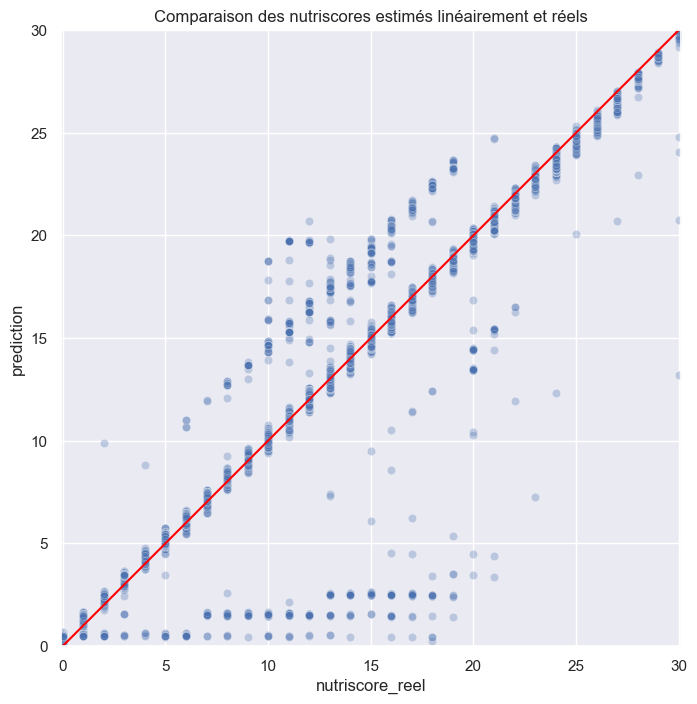

In [223]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Comparaison des nutriscores estimés linéairement et réels')
sns.scatterplot(x = resultat['nutriscore_reel'], y = resultat['prediction'], alpha=0.3)
sns.lineplot([0 , 30], [0, 30], color='red')
ax = plt.gca()
ax.set_xlim(0,30)
ax.set_ylim(0,30)
plt.show()